#### This is a NIFTY-50 Stock Market Data (2000 - 2021) 
#### Source of the dataset : https://www.kaggle.com/rohanrao/nifty50-stock-market-data/code
#### Notebook is solved using the TCS stock market dataset

### Author: Shobhandeb Paul

#### This notebook is for the evaluation purpose for Polestar Hackathon: .Data(Fiesta)

### Technical Stacks used: Scikit Learn, Numpy, Pandas, Matplotlib, Seaborn

### 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### 2. Importing the dataset

In [2]:
tcs_data = pd.read_csv('/home/dev_419/Desktop/TCS.csv')

### 3. Getting to know the dataset

In [3]:
tcs_data.head(10)

Date Symbol Series  Prev Close    Open    High     Low    Last  \
0  2004-08-25    TCS     EQ      850.00  1198.7  1198.7  979.00  985.00   
1  2004-08-26    TCS     EQ      987.95   992.0   997.0  975.30  976.85   
2  2004-08-27    TCS     EQ      979.00   982.4   982.4  958.55  961.20   
3  2004-08-30    TCS     EQ      962.65   969.9   990.0  965.00  986.40   
4  2004-08-31    TCS     EQ      986.75   986.5   990.0  976.00  987.80   
5  2004-09-01    TCS     EQ      988.10   990.0   995.0  983.60  986.00   
6  2004-09-02    TCS     EQ      987.90   989.9  1004.6  986.00  994.00   
7  2004-09-03    TCS     EQ      993.65  1006.0  1100.0  990.35  998.70   
8  2004-09-06    TCS     EQ      997.85  1039.9  1039.9  992.90  996.80   
9  2004-09-07    TCS     EQ      994.85  1035.0  1035.0  995.00  995.00   

    Close     VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  987.95  1008.32  17116372  1.725876e+15     NaN             5206360   
1  979.00   985.65   5055400  4.982865e+14     NaN             1294899   
2  962.65   969.94   3830750  3.715586e+14     NaN              976527   
3  986.75   982.65   3058151  3.005106e+14     NaN              701664   
4  988.10   982.18   2649332  2.602133e+14     NaN              695234   
5  987.90   989.68   2491943  2.466236e+14     NaN              790586   
6  993.65   996.96   2669544  2.661426e+14     NaN              501792   
7  997.85   996.91   1233732  1.229917e+14     NaN              235508   
8  994.85   998.87   1129834  1.128554e+14     NaN              430184   
9  995.60   997.34    721529  7.196109e+13     NaN              198212   

   %Deliverble  
0       0.3042  
1       0.2561  
2       0.2549  
3       0.2294  
4       0.2624  
5       0.3173  
6       0.1880  
7       0.1909  
8       0.3807  
9       0.2747

In [4]:
tcs_data.describe()

Prev Close         Open         High          Low         Last  \
count  4120.000000  4120.000000  4120.000000  4120.000000  4120.000000   
mean   1686.963471  1688.681711  1708.948968  1666.794612  1687.461311   
std     717.375423   717.406704   722.903046   712.398636   717.739377   
min     366.650000   360.000000   377.750000   358.000000   365.700000   
25%    1103.637500  1105.000000  1119.675000  1087.150000  1105.000000   
50%    1613.200000  1606.050000  1638.900000  1586.325000  1613.000000   
75%    2315.475000  2310.437500  2339.062500  2287.012500  2315.950000   
max    3603.700000  3625.000000  3674.800000  3572.550000  3610.750000   

             Close         VWAP        Volume      Turnover         Trades  \
count  4120.000000  4120.000000  4.120000e+03  4.120000e+03    2437.000000   
mean   1687.528483  1687.769393  1.669609e+06  2.918385e+14   84967.876487   
std     717.632735   717.707861  1.603704e+06  3.807667e+14   55479.083759   
min     366.650000   368.400000  1.834500e+04  1.370237e+12    1219.000000   
25%    1103.875000  1104.590000  7.870625e+05  1.045959e+14   46480.000000   
50%    1617.550000  1620.910000  1.222457e+06  1.816235e+14   68120.000000   
75%    2315.862500  2313.140000  2.069038e+06  3.418019e+14  110079.000000   
max    3603.700000  3633.110000  4.403358e+07  1.268362e+16  542541.000000   

       Deliverable Volume  %Deliverble  
count        4.120000e+03  4120.000000  
mean         8.924278e+05     0.549749  
std          8.634132e+05     0.132967  
min          7.765000e+03     0.121400  
25%          4.325130e+05     0.459575  
50%          7.016435e+05     0.554000  
75%          1.134269e+06     0.647100  
max          3.155626e+07     0.962200

In [5]:
tcs_data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [6]:
tcs_data['Date'] = pd.to_datetime(tcs_data.Date,format='%Y-%m-%d')
tcs_data.set_index("Date", drop=False, inplace=True)
tcs_data.drop(["Series","Symbol","Trades","Deliverable Volume","%Deliverble"], axis=1, inplace=True)
tcs_data

Date  Prev Close     Open     High      Low     Last  \
Date                                                                    
2004-08-25 2004-08-25      850.00  1198.70  1198.70   979.00   985.00   
2004-08-26 2004-08-26      987.95   992.00   997.00   975.30   976.85   
2004-08-27 2004-08-27      979.00   982.40   982.40   958.55   961.20   
2004-08-30 2004-08-30      962.65   969.90   990.00   965.00   986.40   
2004-08-31 2004-08-31      986.75   986.50   990.00   976.00   987.80   
...               ...         ...      ...      ...      ...      ...   
2021-03-24 2021-03-24     3142.60  3111.20  3152.30  3111.15  3123.60   
2021-03-25 2021-03-25     3121.10  3112.20  3130.85  3050.00  3074.50   
2021-03-26 2021-03-26     3064.85  3090.65  3118.00  3043.05  3062.00   
2021-03-30 2021-03-30     3066.80  3083.00  3188.45  3060.90  3172.00   
2021-03-31 2021-03-31     3158.55  3155.00  3205.00  3132.00  3175.30   

              Close     VWAP    Volume      Turnover  
Date                                                  
2004-08-25   987.95  1008.32  17116372  1.725876e+15  
2004-08-26   979.00   985.65   5055400  4.982865e+14  
2004-08-27   962.65   969.94   3830750  3.715586e+14  
2004-08-30   986.75   982.65   3058151  3.005106e+14  
2004-08-31   988.10   982.18   2649332  2.602133e+14  
...             ...      ...       ...           ...  
2021-03-24  3121.10  3130.63   2207104  6.909632e+14  
2021-03-25  3064.85  3091.11   3179786  9.829064e+14  
2021-03-26  3066.80  3078.97   3697370  1.138408e+15  
2021-03-30  3158.55  3139.65   4694261  1.473833e+15  
2021-03-31  3177.85  3177.88   3530069  1.121814e+15  

[4120 rows x 10 columns]

In [7]:
tcs_data.astype(int)

Date  Prev Close  Open  High   Low  Last  Close  \
Date                                                                         
2004-08-25  1093392000000000000         850  1198  1198   979   985    987   
2004-08-26  1093478400000000000         987   992   997   975   976    979   
2004-08-27  1093564800000000000         979   982   982   958   961    962   
2004-08-30  1093824000000000000         962   969   990   965   986    986   
2004-08-31  1093910400000000000         986   986   990   976   987    988   
...                         ...         ...   ...   ...   ...   ...    ...   
2021-03-24  1616544000000000000        3142  3111  3152  3111  3123   3121   
2021-03-25  1616630400000000000        3121  3112  3130  3050  3074   3064   
2021-03-26  1616716800000000000        3064  3090  3118  3043  3062   3066   
2021-03-30  1617062400000000000        3066  3083  3188  3060  3172   3158   
2021-03-31  1617148800000000000        3158  3155  3205  3132  3175   3177   

            VWAP    Volume          Turnover  
Date                                          
2004-08-25  1008  17116372  1725876095745000  
2004-08-26   985   5055400   498286476730000  
2004-08-27   969   3830750   371558603080000  
2004-08-30   982   3058151   300510633990000  
2004-08-31   982   2649332   260213265065000  
...          ...       ...               ...  
2021-03-24  3130   2207104   690963185900000  
2021-03-25  3091   3179786   982906410790000  
2021-03-26  3078   3697370  1138408459230000  
2021-03-30  3139   4694261  1473833444425000  
2021-03-31  3177   3530069  1121813515305000  

[4120 rows x 10 columns]

In [8]:
tcs_data.shape

(4120, 10)

### 4. Data Visualization : Plotting Histograms using Seaborn

/home/dev_419/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dev_419/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dev_419/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

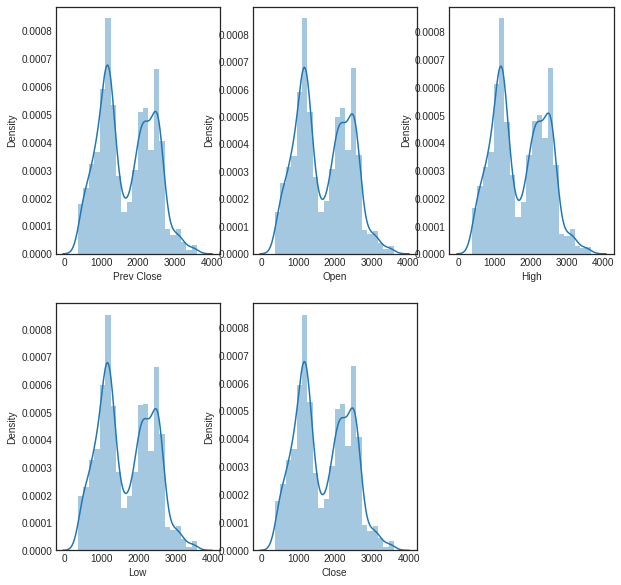

In [9]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

plt.subplot(231)
sns.distplot(tcs_data['Prev Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(tcs_data['Open'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(tcs_data['High'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(tcs_data['Low'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(tcs_data['Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)


In [10]:
tcs_data["month"] = tcs_data.Date.dt.month
tcs_data["week"] = tcs_data.Date.dt.isocalendar().week
tcs_data["day"] = tcs_data.Date.dt.isocalendar().day
tcs_data["day_of_week"] = tcs_data.Date.dt.dayofweek
#tcs_data.drop(['Date'], axis=1, inplace=True)
tcs_data

Date  Prev Close     Open     High      Low     Last  \
Date                                                                    
2004-08-25 2004-08-25      850.00  1198.70  1198.70   979.00   985.00   
2004-08-26 2004-08-26      987.95   992.00   997.00   975.30   976.85   
2004-08-27 2004-08-27      979.00   982.40   982.40   958.55   961.20   
2004-08-30 2004-08-30      962.65   969.90   990.00   965.00   986.40   
2004-08-31 2004-08-31      986.75   986.50   990.00   976.00   987.80   
...               ...         ...      ...      ...      ...      ...   
2021-03-24 2021-03-24     3142.60  3111.20  3152.30  3111.15  3123.60   
2021-03-25 2021-03-25     3121.10  3112.20  3130.85  3050.00  3074.50   
2021-03-26 2021-03-26     3064.85  3090.65  3118.00  3043.05  3062.00   
2021-03-30 2021-03-30     3066.80  3083.00  3188.45  3060.90  3172.00   
2021-03-31 2021-03-31     3158.55  3155.00  3205.00  3132.00  3175.30   

              Close     VWAP    Volume      Turnover  month  week  day  \
Date                                                                     
2004-08-25   987.95  1008.32  17116372  1.725876e+15      8    35    3   
2004-08-26   979.00   985.65   5055400  4.982865e+14      8    35    4   
2004-08-27   962.65   969.94   3830750  3.715586e+14      8    35    5   
2004-08-30   986.75   982.65   3058151  3.005106e+14      8    36    1   
2004-08-31   988.10   982.18   2649332  2.602133e+14      8    36    2   
...             ...      ...       ...           ...    ...   ...  ...   
2021-03-24  3121.10  3130.63   2207104  6.909632e+14      3    12    3   
2021-03-25  3064.85  3091.11   3179786  9.829064e+14      3    12    4   
2021-03-26  3066.80  3078.97   3697370  1.138408e+15      3    12    5   
2021-03-30  3158.55  3139.65   4694261  1.473833e+15      3    13    2   
2021-03-31  3177.85  3177.88   3530069  1.121814e+15      3    13    3   

            day_of_week  
Date                     
2004-08-25            2  
2004-08-26            3  
2004-08-27            4  
2004-08-30            0  
2004-08-31            1  
...                 ...  
2021-03-24            2  
2021-03-25            3  
2021-03-26            4  
2021-03-30            1  
2021-03-31            2  

[4120 rows x 14 columns]

### 5. Data Visualizations: Plotting various graphs , pairplots and heatmap using matplotlib and seaborn

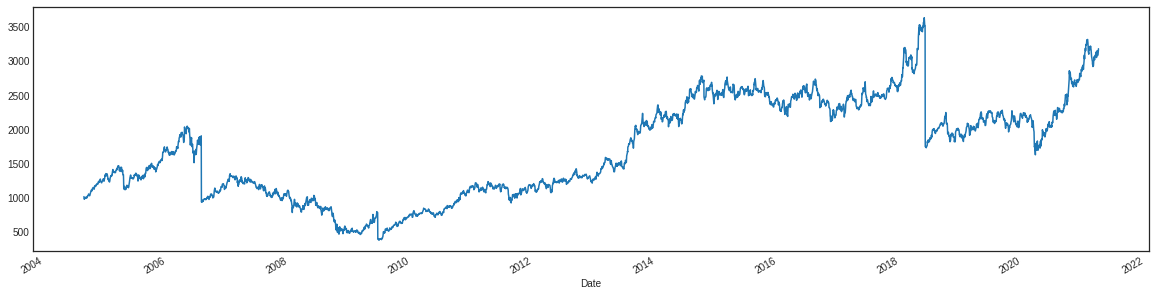

In [11]:
tcs_data.VWAP.plot(figsize=(20, 5))
plt.show()

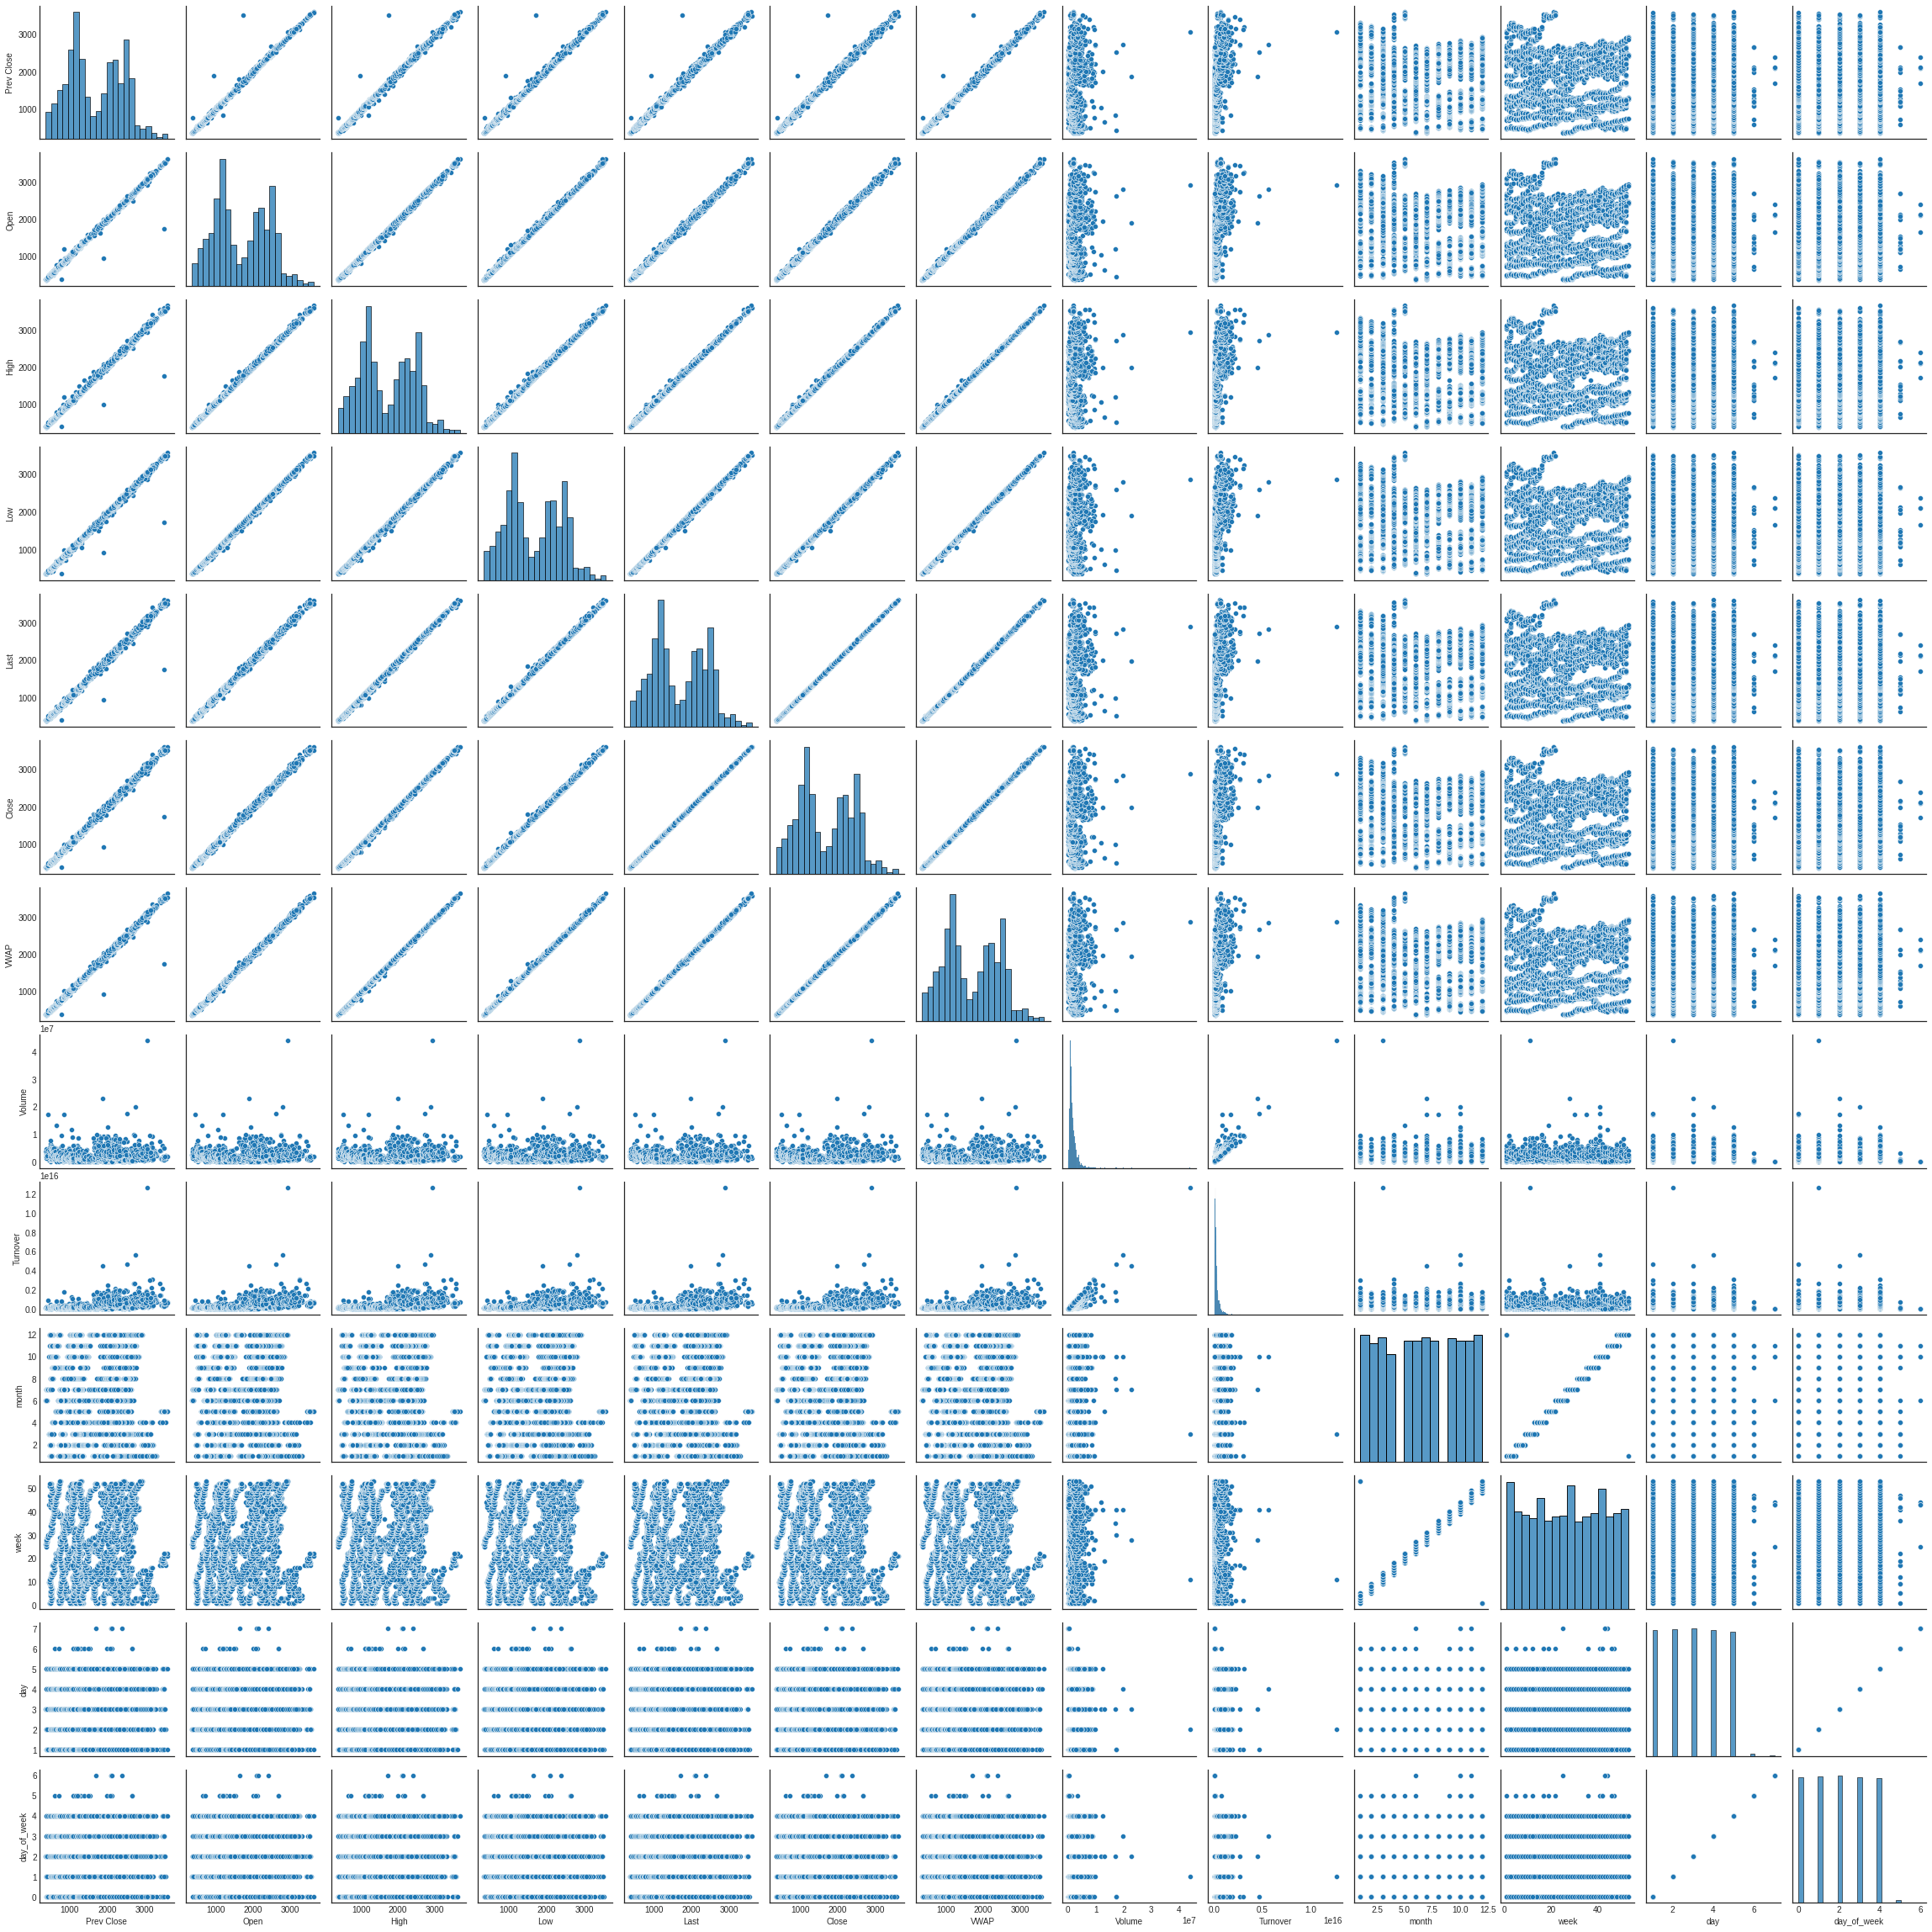

In [12]:
sns.pairplot(tcs_data)

Text(0.5, 1.0, 'Correlations')

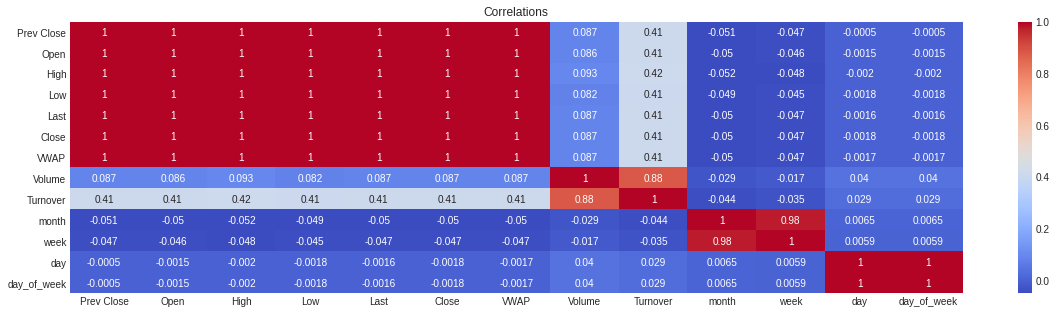

In [13]:
plt.figure(figsize = (20,5))
sns.heatmap(tcs_data.corr(),cmap='coolwarm',annot=True)
plt.title('Correlations')

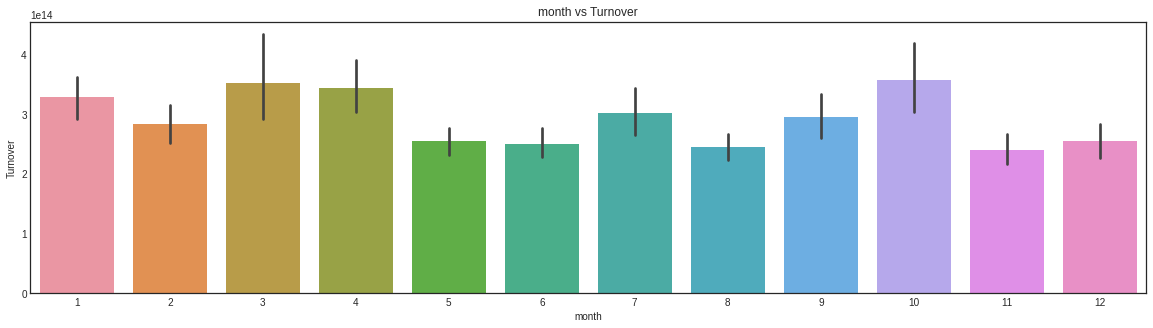

In [14]:
plt.figure(figsize=(20, 5))
sns.barplot(x=tcs_data['month'],y=tcs_data['Turnover'])
plt.xlabel('month')
plt.ylabel('Turnover')
plt.title('month vs Turnover')
plt.show()

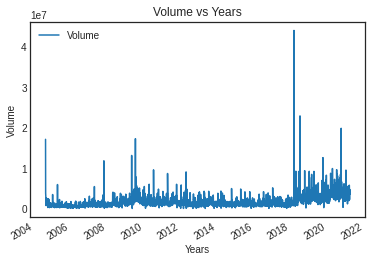

In [15]:
tcs_data[['Volume']].plot(stacked=True)
plt.xlabel('Years')
plt.ylabel('Volume')
plt.title('Volume vs Years')
plt.show()

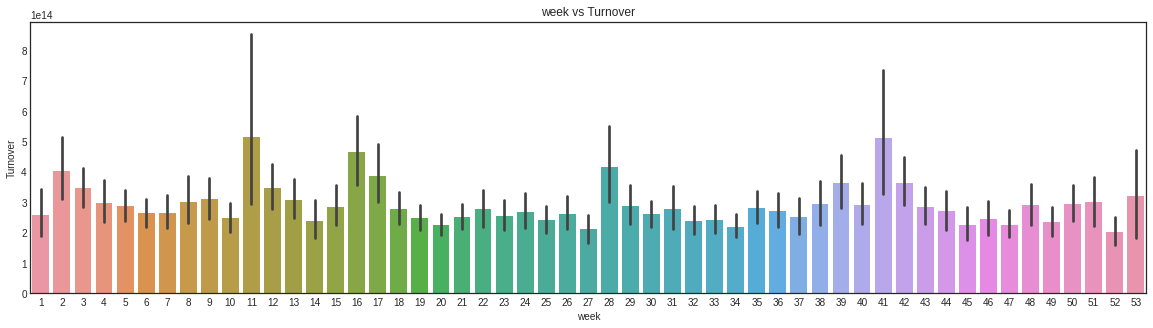

In [16]:
plt.figure(figsize=(20, 5))
sns.barplot(x=tcs_data['week'],y=tcs_data['Turnover'])
plt.xlabel('week')
plt.ylabel('Turnover')
plt.title('week vs Turnover')
plt.show()

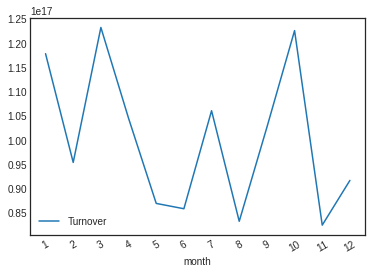

In [17]:
months = np.arange(1,13)
turnover=tcs_data.loc[:, ['Turnover', 'month']].groupby('month').sum()
turnover.plot()
plt.xticks(months,rotation=30)
plt.show()

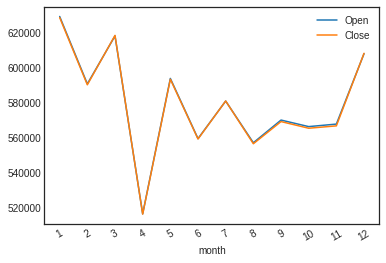

In [18]:
months = np.arange(1,13)
oc=tcs_data.loc[:, ['Open','Close','month']].groupby('month').sum()
oc.plot()
plt.xticks(months,rotation=30)
plt.show()

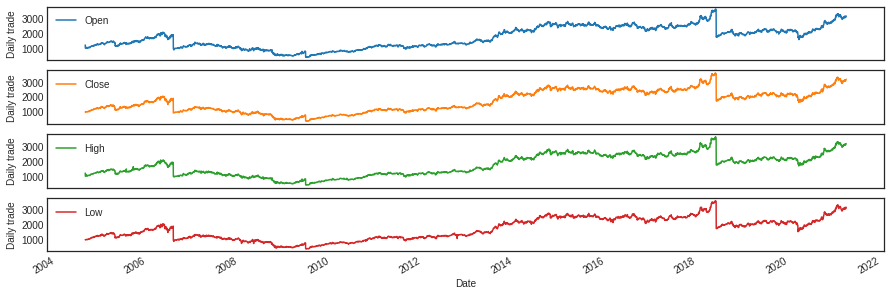

In [19]:
imp_cols = ['Open', 'Close', 'High','Low']
tr1 = tcs_data[imp_cols].plot(marker='', alpha=1, linestyle='solid', figsize=(15,5), subplots=True)
for tr in tr1:
    tr.set_ylabel('Daily trade')

### 6. Volume during Phase 1 Lockdown(25 March – 14 April) and Phase 2 Lockdown (15 April – 3 May)


In [20]:
import plotly.express as px
fig = px.line(tcs_data, x='Date', y='Volume',title='Volume during Phase 1 Lockdown(25 March – 14 April) and Phase 2 Lockdown (15 April – 3 May)', range_x=['2020-01-01','2020-06-30'])
fig.show()

### 7. VWAP after lockdown

In [21]:
fig = px.line(tcs_data, x=tcs_data['Date'], y=tcs_data['VWAP'],title='VWAP after lockdown', range_x=['2020-03-23','2020-06-30'])
fig.show()

<AxesSubplot:xlabel='Date'>

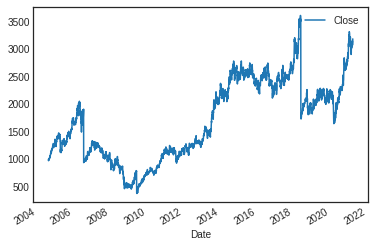

In [22]:
tcs_close=tcs_data[['Close']]

tcs_close.plot()

<AxesSubplot:xlabel='Date'>

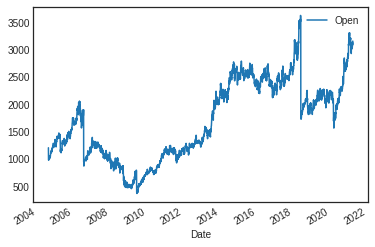

In [23]:
tcs_open=tcs_data[['Open']]

tcs_open.plot()

In [24]:
y = tcs_data['Close']
tcs_data.drop(['VWAP', 'Close'], axis=1, inplace=True)
tcs_data.astype(int)

Date  Prev Close  Open  High   Low  Last    Volume  \
Date                                                                            
2004-08-25  1093392000000000000         850  1198  1198   979   985  17116372   
2004-08-26  1093478400000000000         987   992   997   975   976   5055400   
2004-08-27  1093564800000000000         979   982   982   958   961   3830750   
2004-08-30  1093824000000000000         962   969   990   965   986   3058151   
2004-08-31  1093910400000000000         986   986   990   976   987   2649332   
...                         ...         ...   ...   ...   ...   ...       ...   
2021-03-24  1616544000000000000        3142  3111  3152  3111  3123   2207104   
2021-03-25  1616630400000000000        3121  3112  3130  3050  3074   3179786   
2021-03-26  1616716800000000000        3064  3090  3118  3043  3062   3697370   
2021-03-30  1617062400000000000        3066  3083  3188  3060  3172   4694261   
2021-03-31  1617148800000000000        3158  3155  3205  3132  3175   3530069   

                    Turnover  month  week  day  day_of_week  
Date                                                         
2004-08-25  1725876095745000      8    35    3            2  
2004-08-26   498286476730000      8    35    4            3  
2004-08-27   371558603080000      8    35    5            4  
2004-08-30   300510633990000      8    36    1            0  
2004-08-31   260213265065000      8    36    2            1  
...                      ...    ...   ...  ...          ...  
2021-03-24   690963185900000      3    12    3            2  
2021-03-25   982906410790000      3    12    4            3  
2021-03-26  1138408459230000      3    12    5            4  
2021-03-30  1473833444425000      3    13    2            1  
2021-03-31  1121813515305000      3    13    3            2  

[4120 rows x 12 columns]

In [25]:
tcs_data.drop(['Date'], axis=1, inplace=True)
X = tcs_data.astype(int)
X

Prev Close  Open  High   Low  Last    Volume          Turnover  \
Date                                                                         
2004-08-25         850  1198  1198   979   985  17116372  1725876095745000   
2004-08-26         987   992   997   975   976   5055400   498286476730000   
2004-08-27         979   982   982   958   961   3830750   371558603080000   
2004-08-30         962   969   990   965   986   3058151   300510633990000   
2004-08-31         986   986   990   976   987   2649332   260213265065000   
...                ...   ...   ...   ...   ...       ...               ...   
2021-03-24        3142  3111  3152  3111  3123   2207104   690963185900000   
2021-03-25        3121  3112  3130  3050  3074   3179786   982906410790000   
2021-03-26        3064  3090  3118  3043  3062   3697370  1138408459230000   
2021-03-30        3066  3083  3188  3060  3172   4694261  1473833444425000   
2021-03-31        3158  3155  3205  3132  3175   3530069  1121813515305000   

            month  week  day  day_of_week  
Date                                       
2004-08-25      8    35    3            2  
2004-08-26      8    35    4            3  
2004-08-27      8    35    5            4  
2004-08-30      8    36    1            0  
2004-08-31      8    36    2            1  
...           ...   ...  ...          ...  
2021-03-24      3    12    3            2  
2021-03-25      3    12    4            3  
2021-03-26      3    12    5            4  
2021-03-30      3    13    2            1  
2021-03-31      3    13    3            2  

[4120 rows x 11 columns]

### 8. Data preprocessing and training

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train,X_test,y_train.shape,y_test.shape)

            Prev Close  Open  High   Low  Last   Volume         Turnover  \
Date                                                                       
2013-07-08        1530  1528  1535  1500  1507   829398  125853015709999   
2012-09-03        1343  1350  1354  1333  1334   611913   82132395635000   
2016-04-29        2527  2517  2542  2510  2540  1186089  299987443890000   
2007-07-16        1136  1135  1138  1114  1125   997560  111942559030000   
2013-11-20        2029  2046  2049  2017  2026   829348  168906312245000   
...                ...   ...   ...   ...   ...      ...              ...   
2013-05-13        1489  1480  1481  1445  1451   931249  135952417850000   
2013-09-11        1987  2008  2018  1983  1987  1504247  300722333155000   
2016-05-11        2522  2500  2525  2490  2524   799358  200964815190000   
2010-12-07        1101  1100  1100  1082  1089  1079162  117544409300000   
2013-10-01        1927  1932  1954  1916  1950   795997  154726640060000   

           

In [27]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
(X_test, y_test)

(            Prev Close  Open  High   Low  Last   Volume          Turnover  \
 Date                                                                        
 2017-12-01        2637  2635  2668  2621  2630   515572   136510415075000   
 2017-12-04        2629  2622  2658  2602  2630   629552   165562314870000   
 2017-12-05        2632  2631  2651  2628  2633   583957   154230826440000   
 2017-12-06        2635  2636  2645  2612  2635   703759   184910751960000   
 2017-12-07        2633  2632  2645  2615  2617   663150   173985662475000   
 ...                ...   ...   ...   ...   ...      ...               ...   
 2021-03-24        3142  3111  3152  3111  3123  2207104   690963185900000   
 2021-03-25        3121  3112  3130  3050  3074  3179786   982906410790000   
 2021-03-26        3064  3090  3118  3043  3062  3697370  1138408459230000   
 2021-03-30        3066  3083  3188  3060  3172  4694261  1473833444425000   
 2021-03-31        3158  3155  3205  3132  3175  3530069  112181

### 9. Importing Regression algorithm for model training

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
tcs_linear = LinearRegression()
tcs_linear.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = tcs_linear.predict(X_test)
y_pred

array([2632.9245326 , 2630.66491126, 2634.74157849, 2633.98626923,
       2619.03666314, 2603.38919218, 2667.93484948, 2611.11194781,
       2633.0212419 , 2558.00721297, 2545.35935373, 2571.3778301 ,
       2577.97727266, 2588.71750818, 2584.41310946, 2639.46704546,
       2649.9551546 , 2618.75293743, 2632.10507765, 2697.28446926,
       2651.36136842, 2632.35644143, 2642.10434246, 2650.85040175,
       2694.18002462, 2708.03394642, 2706.11077918, 2798.99903605,
       2793.23002067, 2767.85280132, 2741.73784275, 2855.32282863,
       2896.27316864, 2923.04797674, 2970.77364263, 3084.87471668,
       3099.91949726, 3177.7024549 , 3129.95729785, 3197.9616334 ,
       3154.83043933, 3112.25246497, 3149.55964652, 3153.91898129,
       3114.32671777, 3005.61361546, 2961.15072421, 2970.80237528,
       2973.43048205, 2964.89551655, 2902.53676265, 2922.26405964,
       2937.63722546, 2922.23777224, 2946.75338355, 3039.96705746,
       3041.55023817, 3072.37811716, 3028.26186347, 3044.98282

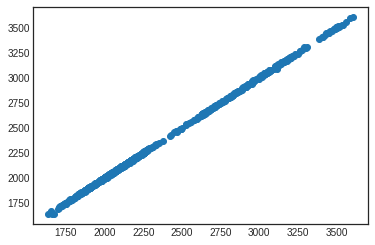

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
from sklearn import metrics

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.971401365667766

The mean squared comes to around 4.97 , which can be considered as a good score for regression algorithm.

In [34]:
metrics.r2_score(y_test,y_pred)

0.9998829041796781

#### While solving the dataset , I came across some issues, for which I took hints from StackOverFlow. I have tried my best to solve the dataset.